# Exercise: matplotlib

## About
These exercises will help you to understand the concepts of the matplotlib visualization package.

### General resources for data visualization using Python

 * https://ft-interactive.github.io/visual-vocabulary/ - Visual Vocabulary from the FT
 
  _There are so many ways to visualise data – how do we know which one to pick?_

 * https://python-graph-gallery.com/ - Python Graph Gallery
  
  _Charts are organized in about 40 sections and always come with their associated reproducible code. They are mostly made with Matplotlib and Seaborn but other library like Plotly are sometimes used_

 * https://matplotlib.org/stable/gallery/index.html

  _Example gallery of plots using `matplotlib` package_

 * https://seaborn.pydata.org/examples/index.html - Seaborn Examples

  _Example gallery of plots using `seaborn` package_

 * https://plotly.com/python/ - The `plotly` Python library
 
  _It is an **interactive**, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases_




### Code hints

#### Importing matplotlib

We usually import the `pyplot` as `plt`:

`from matplotlib import pyplot as plt`

or

`import matplotlib.pyplot as plt`

#### Statistical functions

The `scipy.stats` module (https://docs.scipy.org/doc/scipy/reference/stats.html) provides support for many statistical functions and their relevant methods like:
- `pdf` - Probability density function
- `cdf` - Cumulative distribution function
- `sf` - Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
- `rvs` - Random variates
- etc.


## Tasks

1. Create a line plot visualizing the normal distribution $f(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\left(-\frac{1}{2}(\frac{x-\mu}{\sigma})^2\right)}$ with $\mu = 0$ and $\sigma = 2$.

  (See https://en.wikipedia.org/wiki/Normal_distribution for an example)

2. Label your axes. Add a legend.

3. Draw a vertical dashed line at the maximum.

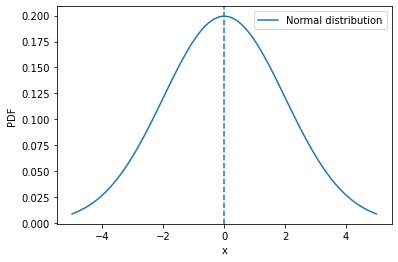

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Create frozen distribution object with given parameters
dist = norm(loc=0, scale=2)

# Tip: you can also use it without frozen object in the form
# norm.pdf(x, loc=0, scale=2)

x = np.linspace(-5, 5, 100)

plt.figure()
# plt.plot(x, dist.pdf(x))
plt.plot(x, norm.pdf(x, loc=0, scale=2), label="Normal distribution")

plt.axvline(0, ls="--")
plt.xlabel("x")
plt.ylabel("PDF")

plt.legend()
plt.show()

4. Draw many random numbers according to the normal distribution and create a histogram. Visualize the histogram and plot the normal distribution from task 1. on top. Increase the line width for better visibility.

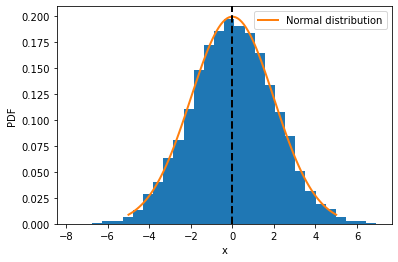

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

random_points = np.random.normal(loc=0, scale=2, size=10000)
x = np.linspace(-5, 5, 100)

plt.figure()
plt.hist(random_points, bins=30, density=True)

plt.plot(x, norm.pdf(x, loc=0, scale=2), lw=2, label="Normal distribution")

plt.axvline(0, ls="--", lw=2, c="black")
plt.xlabel("x")
plt.ylabel("PDF")

plt.legend()
plt.show()

5. Plot scattered data using generated `(x, y)` data points. Style your plot by adding changing point size and marker color.

  (Optional) Fit a line to `(x, y)` distribution and plot it on top of scattered points.

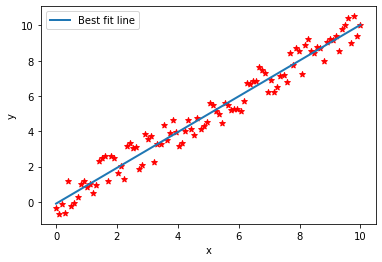

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

# Generate `x` data points for scatter plot
x = np.linspace(0, 10, 100)
# Generate correlated `y` data points with random fluctuations
y = x + np.random.uniform(-1, 1, 100)

# Generate x, y scatter plot

plt.figure()
### Your code here ###
plt.scatter(x, y, c='red', marker='*')

def f(x, k, C): # this is your 'straight line' y=f(x)
    return k*x + C

# `popt` contains best fit values of function arguments
popt, pcov = curve_fit(f, x, y)

y_line = f(x, popt[0], popt[1])
plt.plot(x, y_line, lw=2, label='Best fit line')

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

6. Create a 2D histogram of 50k random number pairs for a 2D normal distribution with means `[0.5, -0.2]` and covariance matrix `[[2.0, 0.3], [0.3, 0.5]]`. As bin width use 0.1.

    6.1. Use the `matplotlib.pyplot.hist2d` function to create the histogram.

    6.2. Use the `numpy.histogramdd` function to create the histogram and then plot the histogram array using the `matplotlib.pyplot.pcolormesh` function.

In [20]:
import numpy as np
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
xy = rv.rvs(size=50000)
bins = [
    np.linspace(-6, 6, int((6-(-6))/0.1+1)),
    np.linspace(-3, 3, int((3-(-3))/0.1+1)),
]

Text(0.5, 1.0, 'matplotlib.pyplot.hist2d')

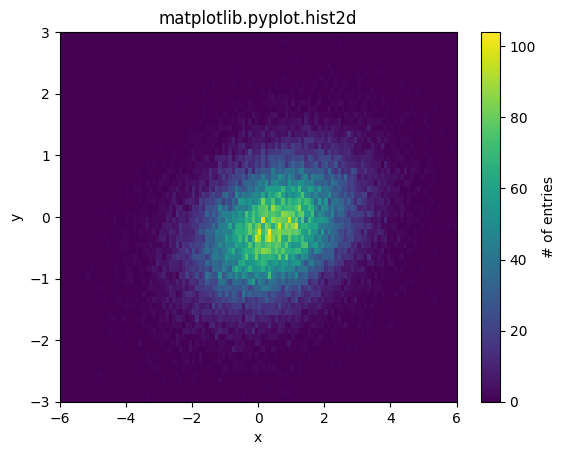

In [21]:
fig = plt.figure()
(h, bins_x, bins_y, mesh) =plt.hist2d(
    x=xy[:,0],
    y=xy[:,1],
    bins=bins,
)
plt.colorbar(label='# of entries')
plt.xlabel('x')
plt.ylabel('y')
plt.title('matplotlib.pyplot.hist2d')

Text(0.5, 1.0, 'numpy.histogram2d & matplotlib.pyplot.pcolormesh')

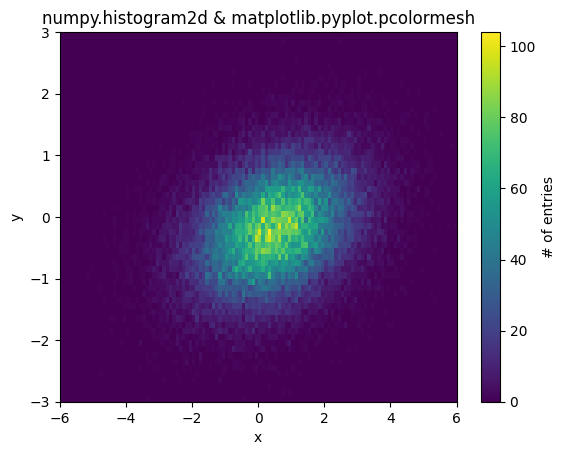

In [22]:
(h, bins_x, bins_y) = np.histogram2d(x=xy[:,0], y=xy[:,1], bins=bins)
plt.pcolormesh(bins_x, bins_y, h.T)
plt.colorbar(label='# of entries')
plt.xlabel('x')
plt.ylabel('y')
plt.title('numpy.histogram2d & matplotlib.pyplot.pcolormesh')